# Arbeidskrav 8: minste kvadraters metode

Oppgitt følgende tabell med bruktbilpriser (i tusen Euro) for en bil som er 1, 2, ..., 5 år gammel:

| År $t_i$   |    1 |    2 |    3 |    4 |    5 |
|------------|------|------|------|------|------|
| Pris $y_i$ | 55.2 | 44.9 | 37.9 | 35.3 | 30.1 |

Lag en linær modell for dataene og plott sammen med datapunktene.

$$ \begin {pmatrix} N & \sum t_i \\ \sum t_i & \sum t_i^2 \end {pmatrix}\begin {pmatrix}\alpha \\ \beta \end {pmatrix} =  \begin {pmatrix} \sum y_i \\ \sum y_it_i  \end {pmatrix}$$




$$\begin {pmatrix} 5 & 15 \\ 15 &  225 \end {pmatrix} \begin {pmatrix}\alpha \\ \beta \end {pmatrix} = \begin {pmatrix}203.4 \\ 550.4 \end {pmatrix}$$


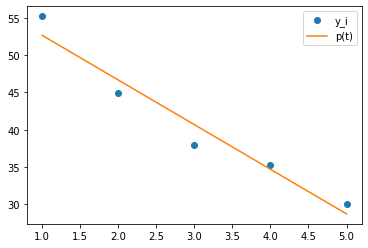

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Lineær

tid=np.arange(1,6)
pris=np.array([55.2,44.9,37.9,35.3,30.1])
N = np.shape(pris)[0]
tid1_sum=tid.sum()
pris_sum=pris.sum()
tid2sum = (tid**2).sum()
pris_tid_sum = (pris*tid).sum()

A = np.array([[N,tid1_sum],[tid1_sum,tid2sum]])
b = np.array([pris_sum, pris_tid_sum])




koeff = np.linalg.solve(A, b)

p_av_t=koeff[0] + koeff[1] * tid

ln = (np.log(koeff[0])) + koeff[1] * tid


# Plot

plt.plot(tid, pris, 'o')
plt.plot(tid, p_av_t)

plt.legend(["y_i","p(t)","ln"])


Istedenfor en lineær modell, kan vi forsøke
$$
p(t) = \alpha e^{\beta t}
$$
Hvis vi tar logaritmen av denne, får vi
$$
\ln(p(t)) = \ln(\alpha) + \beta t
$$
altså en linær modell. Tilpass denne til logaritmen av de opprinnelige datapunktene. Hvilken av modellene passer best til datapunktene?

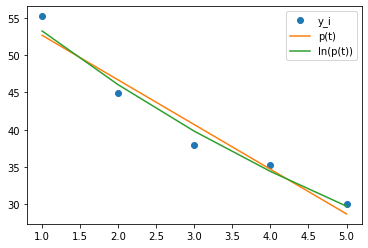

In [26]:

tid=np.arange(1,6)
ln_pris=np.log(np.array([55.2,44.9,37.9,35.3,30.1]))
N = np.shape(ln_pris)[0]
tid1_sum=tid.sum()
ln_pris_sum=ln_pris.sum()
tid2sum = (tid**2).sum()
ln_pris_tid_sum = (ln_pris*tid).sum()

c = np.array([[N,tid1_sum],[tid1_sum,tid2sum]])
d = np.array([ln_pris_sum, ln_pris_tid_sum])




ln_koeff = np.linalg.solve(c, d)

ln_p_av_t=ln_koeff[0] + ln_koeff[1] * tid

plt.plot(tid, pris, 'o')
plt.plot(tid, p_av_t)
plt.plot(tid,np.exp(ln_p_av_t))
plt.legend(["y_i","p(t)","ln(p(t))"])





In [41]:
E_Linear = abs(pris - p_av_t).sum()
E_ln=abs(pris - np.exp(ln_p_av_t)).sum()
print(E_Linear)
print(E_ln)


9.08000000000003
6.226926266613649


Å tilpasse datapunktene til logaritmen 
passer best.